<a href="https://colab.research.google.com/github/IreshaSD/Machine-Learning-Production-Grade-Project/blob/main/ML_Pipelines_with_ZenML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install "zenml[server]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.7/593.7 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.6/525.6 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.6/442.6 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!zenml integration install sklearn -y

⠋ Installing integrations...


In [4]:
%pip install pyparsing==2.4.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.2.3
    Uninstalling pyparsing-3.2.3:
      Successfully uninstalled pyparsing-3.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydot 3.0.4 requires pyparsing>=3.0.9, but you have pyparsing 2.4.2 which is incompatible.
httplib2 0.30.0 requires pyparsing<4,>=3.0.4, but you have pyparsing 2.4.2 which is incompatible.


In [5]:
import IPython

# Automatically restart kernel
IPython.Application.instance().kernel.do_shutdown(restart=True)

{'status': 'ok', 'restart': True}

In [ ]:
%pip install "zenml[server]"
!zenml integration install sklearn -y
%pip install pyparsing==2.4.2
import IPython

# Automatically restart kernel
IPython.Application.instance().kernel.do_shutdown(restart=True)

In [1]:
!pip install pyngrok


In [2]:
import os
from pyngrok import ngrok
from google.colab import userdata

# Read Secret from Colab's secrets manager
NGROK_AUTH_TOKEN = userdata.get("NGROK_AUTH_TOKEN")
os.environ["NGROK_AUTH_TOKEN"] = NGROK_AUTH_TOKEN


# Set token
authtoken = os.environ["NGROK_AUTH_TOKEN"]
ngrok.set_auth_token(authtoken)



In [3]:
from zenml.environment import Environment

if Environment.in_google_colab(): # Colab only setup
    !ngrok authtoken {authtoken}

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [4]:
# ZenML Setup
!rm -rf .zen
!zenml init

Initializing the ZenML global configuration version to 0.84.3
⠋ Initializing ZenML repository at /content.
⠙ Initializing ZenML repository at /content.
⠹ Initializing ZenML repository at /content.
⠸ Initializing ZenML repository at /content.
⠼ Initializing ZenML repository at /content.
⠴ Initializing ZenML repository at /content.
⠧ Initializing ZenML repository at /content.
⠏ Initializing ZenML repository at /content.
⠋ Initializing ZenML repository at /content.
⠙ Initializing ZenML repository at /content.
⠹ Initializing ZenML repository at /content.
⠸ Initializing ZenML repository at /content.
⠼ Initializing ZenML repository at /content.
⠴ Initializing ZenML repository at /content.
⠦ Initializing ZenML repository at /content.
⠧ Initializing ZenML repository at /content.
⠋ Initializing ZenML repository at /content.
⠙ Initializing ZenML repository at /content.
⠹ Initializing ZenML repository at /content.
⠼ Initializing ZenML repository at /content.
⠴ Initializing ZenML repository at /co

### **Example Experimentation ML Code**

**Let us get started with some simple examplary ML code. In the following , we train a Scikit-learn SVC classifier to classify images of handwritten digits. We load the data, train a model on the training set, then test it on the test set.**

In [5]:
import numpy as np
from sklearn.base import ClassifierMixin
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

def train_test() -> None:
    "Train and test a Scikit-Learn SVC classifier on digits"

    digits = load_digits()
    data = digits.images.reshape((len(digits.images),-1))
    X_train,X_test,Y_train,Y_test = train_test_split(data,digits.target,test_size=0.2,shuffle=False)

    model = SVC(gamma=0.001)
    model.fit(X_train,Y_train)
    test_acc = model.score(X_test,Y_test)
    print(f"Test accuracy:{test_acc}")

train_test()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


NumExpr defaulting to 2 threads.
Test accuracy:0.9583333333333334


### **Turning experiments into ML pipeline swith ZenML**


In practice, Your ML wrkflows will ,of course, be much more complicated than that . You might have complex preprocessing that you don't want to redo every time you train a model, you will need to compare the performance of different models, deploy them in a production setting , and much more. Here ML pipelines come into play, allowing us to define our workflows in modular steps that we can then mix and match.

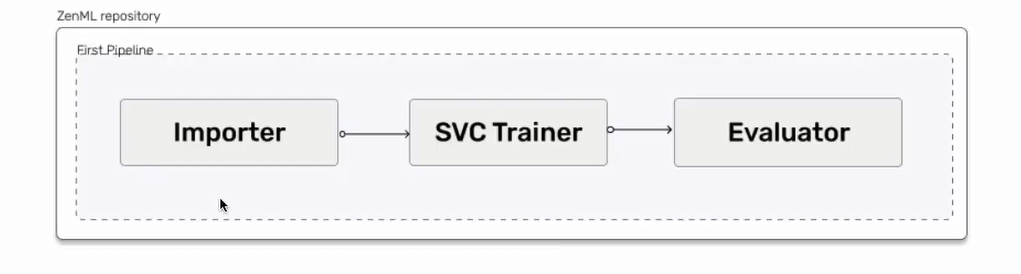

We can identify three distinct steps in  our example data loading, model training , and model evaluation. Let us now define each of them as a ZenML Pipeline Step. Simply by moving each step to its own function and decorating them with ZenML's @step Python decorator.

In [6]:
from zenml import step
from typing_extensions import Annotated
import pandas as pd
from typing import Tuple

In [14]:
@step
def importer()->Tuple[
    Annotated[np.ndarray, "X_train"],
    Annotated[np.ndarray, "X_test"],
    Annotated[np.ndarray, "y_train"],
    Annotated[np.ndarray, "y_test"],
]:
    """Loads and splits the digits dataset."""
    digits = load_digits()
    data = digits.images.reshape((len(digits.images),-1))
    X_train,X_test,Y_train,Y_test = train_test_split(data,digits.target,test_size=0.2,shuffle=False)
    return X_train,X_test,Y_train,Y_test